In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Training Data.csv")
data.head()

,peubah1,peubah2,peubah3,peubah4,peubah5,peubah6,peubah7,peubah8,peubah9,peubah10,...,peubah13,peubah14,peubah15,peubah16,peubah17,peubah18,peubah19,peubah20,peubah21,target
0,0.416471,0.433618,0.480263,0.391386,0.312282,0.350107,0.479583,0.366904,0.297115,0.407623,...,0.346316,0.519490,0.462123,0.351881,0.454687,0.480554,0.441771,0.381719,0.360698,1
1,0.393217,0.461127,0.453290,0.404972,0.376990,0.392576,0.406791,0.408893,0.255766,0.491208,...,0.358346,0.479205,0.447285,0.335229,0.445615,0.451973,0.421719,0.376270,0.305129,0
2,0.411785,0.463772,0.417967,0.454509,0.415468,0.418473,0.335786,0.397057,0.359163,0.497376,...,0.396283,0.412580,0.368068,0.388834,0.415171,0.412811,0.359205,0.373100,0.299415,0
3,0.416128,0.434078,0.483265,0.357681,0.308477,0.342319,0.500872,0.375741,0.270538,0.421817,...,0.339275,0.538065,0.476383,0.341957,0.457817,0.490621,0.454611,0.392002,0.369631,1
4,0.431211,0.460969,0.418770,0.449622,0.409211,0.449635,0.370591,0.372039,0.324457,0.457634,...,0.404351,0.423462,0.393851,0.387756,0.408308,0.411725,0.390778,0.366613,0.321540,1


In [3]:
data.shape

(21681, 22)

In [4]:
data.isnull().sum()

peubah1     0
peubah2     0
peubah3     0
peubah4     0
peubah5     0
peubah6     0
peubah7     0
peubah8     0
peubah9     0
peubah10    0
peubah11    0
peubah12    0
peubah13    0
peubah14    0
peubah15    0
peubah16    0
peubah17    0
peubah18    0
peubah19    0
peubah20    0
peubah21    0
target      0
dtype: int64

In [6]:
def extractData(data):
    y = data["target"]
    x = data.drop(["target"], axis = 1)
    
    return x, y, data

In [7]:
x, y, data = extractData(data)

In [8]:
y.value_counts(normalize=True)

1    0.503897
0    0.496103
Name: target, dtype: float64

## Train Test Split

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1.0/3, random_state = 123)

## The Classifier

In [10]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, log_loss
from sklearn.externals import joblib

In [11]:
def evalModel(x, y, clf):
    print "Accuracy  : %.5f" % accuracy_score(y, clf.predict(x))
    print "Recall    : %.5f" % recall_score(y, clf.predict(x))
    print "Precision : %.5f" % precision_score(y, clf.predict(x))
    print "F1 score  : %.5f" % f1_score(y, clf.predict(x))
    print "Log_loss  : %.5f" % log_loss(y, clf.predict_proba(x))
    print "AUC score : %.5f" % roc_auc_score(y, clf.predict_proba(x)[:,1])

## Logistic Regressions

In [12]:
logreg = LogisticRegression(random_state=123)
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=123, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

* Model Evaluation

In [13]:
evalModel(x_train, y_train, logreg)

Accuracy  : 0.52435
Recall    : 0.61412
Precision : 0.52609
F1 score  : 0.56671
Log_loss  : 0.69153
AUC score : 0.53192


In [14]:
evalModel(x_test, y_test, logreg)

Accuracy  : 0.51695
Recall    : 0.60072
Precision : 0.51340
F1 score  : 0.55364
Log_loss  : 0.69297
AUC score : 0.51673


* Cross Validation

In [15]:
scoreLogReg = cross_val_score(logreg, x_train, y_train, cv = 5, scoring="accuracy")
print "Accuracy: %0.4f (+/- %0.4f)" % (scoreLogReg.mean(), scoreLogReg.std())

Accuracy: 0.5226 (+/- 0.0081)


## Randomized Search

In [16]:
param = {'C': [0.01, 0.033, 0.1, 0.33, 1, 3, 10, 33, 100, 333]}

In [17]:
rsLogReg = RandomizedSearchCV(estimator=logreg, param_distributions=param, cv=5, 
                        n_iter=5, n_jobs=-1, verbose=True, scoring="accuracy")
rsLogReg.fit(x_train, y_train)
rsLogReg.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   16.0s finished


{'C': 100}

In [18]:
rsLogReg.best_score_

0.52421475024214748

* Grid Search

In [19]:
gsLogReg = GridSearchCV(estimator=logreg, param_grid=param, cv=5, 
                  n_jobs=-1, verbose=True, scoring="accuracy")
gsLogReg.fit(x_train, y_train)
gsLogReg.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   17.1s finished


{'C': 100}

In [20]:
gsLogReg.best_score_

0.52421475024214748

* Fit the best Model

In [142]:
logregBest = LogisticRegression(C=100, random_state=123)
logregBest.fit(x_train, y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=123, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [143]:
evalModel(x_test, y_test, logregBest)

Accuracy  : 0.51557
Recall    : 0.60322
Precision : 0.51213
F1 score  : 0.55396
Log_loss  : 0.69291
AUC score : 0.51994


* Save Model

In [144]:
joblib.dump(logregBest, "logreg.pkl")

['logreg.pkl']

## Naive Bayes

In [24]:
gausNB = GaussianNB()
gausNB.fit(x_train, y_train)

GaussianNB(priors=None)

* Model Evaluation

In [25]:
evalModel(x_train, y_train, gausNB)

Accuracy  : 0.51481
Recall    : 0.44092
Precision : 0.52505
F1 score  : 0.47932
Log_loss  : 0.71221
AUC score : 0.52268


In [26]:
evalModel(x_test, y_test, gausNB)

Accuracy  : 0.50560
Recall    : 0.43590
Precision : 0.50498
F1 score  : 0.46791
Log_loss  : 0.71835
AUC score : 0.50877


* Cross Validation

In [27]:
scoreGausNB = cross_val_score(gausNB, x_train, y_train, cv = 7)
print "Accuracy: %0.4f (+/- %0.4f)" % (scoreGausNB.mean(), scoreGausNB.std())

Accuracy: 0.5100 (+/- 0.0076)


In [28]:
berNB = BernoulliNB()
berNB.fit(x_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

* Model Evaluation

In [29]:
evalModel(x_train, y_train, berNB)

Accuracy  : 0.50657
Recall    : 1.00000
Precision : 0.50654
F1 score  : 0.67245
Log_loss  : 0.69300
AUC score : 0.50021


In [30]:
evalModel(x_test, y_test, berNB)

Accuracy  : 0.49869
Recall    : 1.00000
Precision : 0.49869
F1 score  : 0.66550
Log_loss  : 0.69327
AUC score : 0.50000


* Cross Validation

In [32]:
scoreBerNB = cross_val_score(gausNB, x_train, y_train, cv = 7)
print "Accuracy: %0.4f (+/- %0.4f)" % (scoreBerNB.mean(), scoreBerNB.std())

Accuracy: 0.5100 (+/- 0.0076)


## K-Nearst Neighbor

In [33]:
knn = KNeighborsClassifier(n_jobs=-1)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')

* Model Evaluation

In [34]:
evalModel(x_train, y_train, knn)

Accuracy  : 0.69012
Recall    : 0.70373
Precision : 0.69043
F1 score  : 0.69702
Log_loss  : 0.57197
AUC score : 0.75104


In [35]:
evalModel(x_test, y_test, knn)

Accuracy  : 0.50076
Recall    : 0.52830
Precision : 0.49948
F1 score  : 0.51348
Log_loss  : 1.85361
AUC score : 0.50030


* Cross Validation

In [36]:
scoreKNN = cross_val_score(knn, x_train, y_train, cv = 7)
print "Accuracy: %0.4f (+/- %0.4f)" % (scoreKNN.mean(), scoreKNN.std())

Accuracy: 0.4983 (+/- 0.0092)


* Randomized Search

In [37]:
param = {'n_neighbors': [2, 3, 5, 8, 13, 20, 30, 50]}

In [38]:
rsKNN = RandomizedSearchCV(estimator=knn, param_distributions=param, cv=5, 
                        n_iter=5, n_jobs=-1, verbose=True, scoring="accuracy", random_state = 123)
rsKNN.fit(x_train, y_train)
rsKNN.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   21.9s finished


{'n_neighbors': 50}

In [39]:
rsKNN.best_score_

0.51279922512799225

In [40]:
evalModel(x_test, y_test, rsKNN)

Accuracy  : 0.51017
Recall    : 0.52192
Precision : 0.50865
F1 score  : 0.51520
Log_loss  : 0.70358
AUC score : 0.50451


* Grid Search

In [41]:
gsKNN = GridSearchCV(estimator=knn, param_grid=param, cv=5, 
                        n_jobs=-1, verbose=True, scoring="accuracy")
gsKNN.fit(x_train, y_train)
gsKNN.best_params_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   28.3s finished


{'n_neighbors': 50}

In [42]:
gsKNN.best_score_

0.51279922512799225

* Fit the Best Model

In [118]:
knnBest = KNeighborsClassifier(n_neighbors=50, n_jobs=-1)
knnBest.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=50, p=2,
           weights='uniform')

In [119]:
evalModel(x_train, y_train, knnBest)

Accuracy  : 0.56005
Recall    : 0.57711
Precision : 0.56424
F1 score  : 0.57060
Log_loss  : 0.68143
AUC score : 0.58597


In [120]:
evalModel(x_test, y_test, knnBest)

Accuracy  : 0.51017
Recall    : 0.52192
Precision : 0.50865
F1 score  : 0.51520
Log_loss  : 0.70358
AUC score : 0.50451


* Save Model

In [121]:
joblib.dump(knnBest, "knn.pkl")

['knn.pkl']

## SVM

* Linear SVM

In [45]:
linSVC = SVC(kernel = 'linear', random_state=123, probability=True)
linSVC.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=123, shrinking=True,
  tol=0.001, verbose=False)

In [46]:
evalModel(x_train, y_train, linSVC)

Accuracy  : 0.52504
Recall    : 0.61617
Precision : 0.52662
F1 score  : 0.56789
Log_loss  : 0.69409
AUC score : 0.46859


In [47]:
evalModel(x_test, y_test, linSVC)

Accuracy  : 0.51308
Recall    : 0.59795
Precision : 0.51006
F1 score  : 0.55052
Log_loss  : 0.69391
AUC score : 0.48424


* RBF Kernel SVM

In [48]:
svClass = SVC(kernel = 'rbf', random_state=123, probability=True)
svClass.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=123, shrinking=True,
  tol=0.001, verbose=False)

In [49]:
evalModel(x_train, y_train, svClass)

Accuracy  : 0.50650
Recall    : 1.00000
Precision : 0.50650
F1 score  : 0.67242
Log_loss  : 0.69379
AUC score : 0.47145


In [50]:
evalModel(x_test, y_test, svClass)

Accuracy  : 0.49869
Recall    : 1.00000
Precision : 0.49869
F1 score  : 0.66550
Log_loss  : 0.69342
AUC score : 0.48776


In [51]:
scoreSVM = cross_val_score(svClass, x_train, y_train, cv = 7)
print "Accuracy: %0.4f (+/- %0.4f)" % (scoreSVM.mean(), scoreSVM.std())

Accuracy: 0.5066 (+/- 0.0002)


* Randomized Search

In [52]:
param = {'C': [0.01, 0.033, 0.1, 0.33, 1, 3, 10, 33, 100, 333],
        'gamma': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]}

In [53]:
rsSVM = RandomizedSearchCV(estimator=svClass, param_distributions=param, cv=5, 
                        n_iter=10, n_jobs=-1, verbose=True, scoring="accuracy", random_state = 123)
rsSVM.fit(x_train, y_train)
rsSVM.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 17.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 22.9min finished


{'C': 100, 'gamma': 0.1}

In [54]:
evalModel(x_test, y_test, rsSVM)

Accuracy  : 0.51335
Recall    : 0.76665
Precision : 0.50800
F1 score  : 0.61108
Log_loss  : 0.69309
AUC score : 0.51986


* Fit the Best Model

In [60]:
SVMBest = SVC(kernel = 'rbf', random_state=123, probability=True, C = 100, gamma = 0.1)
SVMBest.fit(x_train, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=True, random_state=123, shrinking=True,
  tol=0.001, verbose=False)

* Save Model

In [61]:
joblib.dump(SVMBest, 'SVM.pkl')

['SVM.pkl']

## Decision Tree

In [62]:
decTree = DecisionTreeClassifier(random_state=123)
decTree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=123, splitter='best')

In [63]:
evalModel(x_train, y_train, decTree)

Accuracy  : 1.00000
Recall    : 1.00000
Precision : 1.00000
F1 score  : 1.00000
Log_loss  : 0.00000
AUC score : 1.00000


In [64]:
evalModel(x_test, y_test, decTree)

Accuracy  : 0.50505
Recall    : 0.51471
Precision : 0.50367
F1 score  : 0.50913
Log_loss  : 17.09495
AUC score : 0.50508


* Cross Validation

In [65]:
score = cross_val_score(decTree, x_train, y_train, cv = 7, n_jobs=-1)
print "Accuracy: %0.4f (+/- %0.4f)" % (score.mean(), score.std())

Accuracy: 0.5033 (+/- 0.0123)


* Randomized Search

In [66]:
param = {'max_depth': [1, 3, 5, 7, 10, 15, 20, 30, 50, 100],
         'criterion': ['gini', 'entropy']}

In [67]:
rsDecTree = RandomizedSearchCV(estimator=decTree, param_distributions=param, cv=5, 
                        n_iter=5, n_jobs=-1, verbose=True, scoring="accuracy", random_state = 123)
rsDecTree.fit(x_train, y_train)
rsDecTree.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   14.5s finished


{'criterion': 'gini', 'max_depth': 15}

In [68]:
rsDecTree.best_score_

0.51266085512660853

In [69]:
evalModel(x_train, y_train, rsDecTree)

Accuracy  : 0.65221
Recall    : 0.81737
Precision : 0.61857
F1 score  : 0.70421
Log_loss  : 0.53574
AUC score : 0.74724


* Grid Search

In [70]:
gsDecTree = GridSearchCV(estimator=decTree, param_grid=param, cv=5, 
                        n_jobs=-1, verbose=True, scoring="accuracy")
gsDecTree.fit(x_train, y_train)
gsDecTree.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   22.6s finished


{'criterion': 'entropy', 'max_depth': 100}

In [71]:
gsDecTree.best_score_

0.51411374014113742

In [72]:
evalModel(x_train, y_train, gsDecTree)

Accuracy  : 1.00000
Recall    : 1.00000
Precision : 1.00000
F1 score  : 1.00000
Log_loss  : 0.00000
AUC score : 1.00000


* Fit the Best Model

In [73]:
decTreeBest = DecisionTreeClassifier(max_depth = 100, criterion='entropy', random_state = 123)
decTreeBest.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=100,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=123, splitter='best')

* Save Model

In [74]:
joblib.dump(decTreeBest, "decTree.pkl")

['decTree.pkl']

## Bagging Classifier

In [75]:
bagTree = BaggingClassifier(base_estimator=decTreeBest, n_estimators=1000, 
                            n_jobs=-1, random_state = 123)
bagTree.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=100,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=123, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=1000, n_jobs=-1, oob_score=False,
         random_state=123, verbose=0, warm_start=False)

In [76]:
evalModel(x_train, y_train, bagTree)

Accuracy  : 1.00000
Recall    : 1.00000
Precision : 1.00000
F1 score  : 1.00000
Log_loss  : 0.20356
AUC score : 1.00000


In [77]:
evalModel(x_test, y_test, bagTree)

Accuracy  : 0.49329
Recall    : 0.52192
Precision : 0.49241
F1 score  : 0.50673
Log_loss  : 0.71839
AUC score : 0.50017


* Cross Validation

In [78]:
scoreBag = cross_val_score(bagTree, x_train, y_train, cv = 7, n_jobs=-1)
print "Accuracy: %0.4f (+/- %0.4f)" % (scoreBag.mean(), scoreBag.std())

Accuracy: 0.5042 (+/- 0.0058)


* Save Model

In [79]:
joblib.dump(bagTree, 'bagTree.pkl')

['bagTree.pkl']

## Random Forest Classifier

In [80]:
ranFor = RandomForestClassifier(n_estimators=1000, random_state=123, n_jobs = -1, max_features='log2')
ranFor.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=-1, oob_score=False,
            random_state=123, verbose=0, warm_start=False)

In [81]:
evalModel(x_train, y_train, ranFor)

Accuracy  : 1.00000
Recall    : 1.00000
Precision : 1.00000
F1 score  : 1.00000
Log_loss  : 0.20367
AUC score : 1.00000


In [82]:
evalModel(x_test, y_test, ranFor)

Accuracy  : 0.49938
Recall    : 0.51859
Precision : 0.49813
F1 score  : 0.50816
Log_loss  : 0.71754
AUC score : 0.50349


* Cross Validation

In [83]:
scoreRF = cross_val_score(ranFor, x_train, y_train, cv = 7, n_jobs=-1, scoring="accuracy")
print "Accuracy: %0.4f (+/- %0.4f)" % (scoreRF.mean(), scoreRF.std())

Accuracy: 0.5039 (+/- 0.0051)


* Randomized Search

In [84]:
param = {'max_depth': [1, 3, 5, 8, 13, 20, 30, 50, 100],
         'max_features': ['sqrt', 'log2']}

In [85]:
rsRF = RandomizedSearchCV(estimator=ranFor, param_distributions=param, cv=5, 
                        n_iter=5, n_jobs=-1, verbose=True, scoring="accuracy")
rsRF.fit(x_train, y_train)
rsRF.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  6.3min finished


{'max_depth': 3, 'max_features': 'log2'}

In [86]:
rsRF.best_score_

0.51944098519440984

* Grid Search

In [87]:
gsRF = GridSearchCV(estimator=ranFor, param_grid=param, cv=5, 
                  n_jobs=-1, verbose=True, scoring="accuracy")
gsRF.fit(x_train, y_train)
gsRF.best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 12.2min finished


{'max_depth': 5, 'max_features': 'sqrt'}

In [88]:
gsRF.best_score_

0.51978691019786916

In [89]:
ranForestBest = RandomForestClassifier(n_estimators=1000, random_state=123, n_jobs = -1, 
                                       max_features='sqrt', max_depth = 30)
ranForestBest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=30, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=-1, oob_score=False,
            random_state=123, verbose=0, warm_start=False)

* Save Model

In [90]:
joblib.dump(ranForestBest, 'ranforest.pkl')

['ranforest.pkl']

## Adaboost

In [91]:
adaboost = AdaBoostClassifier(base_estimator=decTreeBest, n_estimators=1000, 
                              learning_rate = 0.1, random_state = 123)
adaboost.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=100,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=123, splitter='best'),
          learning_rate=0.1, n_estimators=1000, random_state=123)

In [92]:
evalModel(x_train, y_train, adaboost)

Accuracy  : 1.00000
Recall    : 1.00000
Precision : 1.00000
F1 score  : 1.00000
Log_loss  : 0.00000
AUC score : 1.00000


In [93]:
evalModel(x_test, y_test, adaboost)

Accuracy  : 0.49426
Recall    : 0.50777
Precision : 0.49313
F1 score  : 0.50034
Log_loss  : 17.46772
AUC score : 0.49429


* Grid Search

In [94]:
param = {'learning_rate': [0.01, 0.033, 0.1, 0.33, 1, 3, 10, 33, 100]}

In [95]:
gsAdB = GridSearchCV(estimator=adaboost, param_grid=param, cv=5, 
                  n_jobs=-1, verbose=True, scoring="accuracy")
gsAdB.fit(x_train, y_train)
gsAdB.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   47.8s finished


{'learning_rate': 0.01}

* Fit the best Model

In [96]:
adaboostBest = AdaBoostClassifier(base_estimator=decTreeBest, n_estimators=1000, 
                              learning_rate = 0.01, random_state = 123)
adaboostBest.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=100,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=123, splitter='best'),
          learning_rate=0.01, n_estimators=1000, random_state=123)

* Save Model

In [97]:
joblib.dump(adaboostBest, 'adaboost.pkl')

['adaboost.pkl']

## Gradient Boosting

In [98]:
gradBoost = GradientBoostingClassifier(n_estimators=1000, random_state=123)
gradBoost.fit(x_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=1000, presort='auto', random_state=123,
              subsample=1.0, verbose=0, warm_start=False)

In [99]:
evalModel(x_train, y_train, gradBoost)

Accuracy  : 0.83894
Recall    : 0.86300
Precision : 0.82664
F1 score  : 0.84443
Log_loss  : 0.52079
AUC score : 0.92513


In [100]:
evalModel(x_test, y_test, gradBoost)

Accuracy  : 0.50131
Recall    : 0.53552
Precision : 0.50000
F1 score  : 0.51715
Log_loss  : 0.72358
AUC score : 0.50202


* Randomized Search

In [101]:
param = {'max_depth': [1, 3, 5, 8, 13, 20, 30, 50, 100],
         'max_features': ['auto', 'sqrt', 'log2'],
         'learning_rate': [0.01, 0.015, 0.02, 0.05, 0.08, 0.1] }

In [102]:
rsGradBoost = RandomizedSearchCV(estimator=gradBoost, param_distributions=param, cv=5,
                                  n_iter=50, n_jobs=-1, verbose=True, scoring="accuracy",
                                  random_state = 123)
rsGradBoost.fit(x_train, y_train)
rsGradBoost.best_params_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 69.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 92.5min finished


{'learning_rate': 0.05, 'max_depth': 1, 'max_features': 'sqrt'}

In [103]:
gradBoostBest = GradientBoostingClassifier(learning_rate=0.05, max_depth = 1, max_features = 'sqrt',
                                          random_state = 123, n_estimators = 1000)
gradBoostBest.fit(x_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=1,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=1000, presort='auto', random_state=123,
              subsample=1.0, verbose=0, warm_start=False)

In [104]:
evalModel(x_test, y_test, gradBoostBest)

Accuracy  : 0.51391
Recall    : 0.57048
Precision : 0.51132
F1 score  : 0.53928
Log_loss  : 0.69425
AUC score : 0.51283


* Save Model

In [105]:
joblib.dump(gradBoostBest, 'gradBoost.pkl')

['gradBoost.pkl']

## Stacking Model

In [106]:
clf = [logregBest, knnBest, bagTree, ranForestBest, adaboostBest, gradBoostBest]
logregCVStacking = LogisticRegressionCV(random_state= 123, cv = 5)

In [114]:
from mlxtend.classifier import StackingClassifier

In [115]:
sclf = StackingClassifier(classifiers=clf,
                          use_probas=True,
                          average_probas=False,
                          meta_classifier= logregCVStacking)

In [116]:
sclf.fit(x_train, y_train)

StackingClassifier(average_probas=False,
          classifiers=[LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=123, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False), KNeighborsClassifier(al...s=1000, presort='auto', random_state=123,
              subsample=1.0, verbose=0, warm_start=False)],
          meta_classifier=LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=123,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0),
          use_features_in_secondary=False, use_probas=True, verbose=0)

In [117]:
evalModel(x_test, y_test, sclf)

Accuracy  : 0.49426
Recall    : 0.50777
Precision : 0.49313
F1 score  : 0.50034
Log_loss  : 0.70651
AUC score : 0.49598


In [145]:
''' overall evaluation model'''
for i in clf:
    print(evalModel(x_test, y_test, i))

Accuracy  : 0.51557
Recall    : 0.59295
Precision : 0.51235
F1 score  : 0.54971
Log_loss  : 0.69297
AUC score : 0.51844
None
Accuracy  : 0.49564
Recall    : 0.38152
Precision : 0.49265
F1 score  : 0.43002
Log_loss  : 0.87187
AUC score : 0.50110
None
Accuracy  : 0.49329
Recall    : 0.52192
Precision : 0.49241
F1 score  : 0.50673
Log_loss  : 0.71839
AUC score : 0.50017
None
Accuracy  : 0.49619
Recall    : 0.51609
Precision : 0.49508
F1 score  : 0.50537
Log_loss  : 0.71520
AUC score : 0.50324
None
Accuracy  : 0.49426
Recall    : 0.50777
Precision : 0.49313
F1 score  : 0.50034
Log_loss  : 17.46772
AUC score : 0.49429
None
Accuracy  : 0.51391
Recall    : 0.57048
Precision : 0.51132
F1 score  : 0.53928
Log_loss  : 0.69425
AUC score : 0.51283
None


In [160]:
j = []
for i in clf:
    print "Log_loss  : %.5f" % log_loss(y_test, i.predict_proba(x_test))
    j.append(log_loss(y_test, i.predict_proba(x_test)))

Log_loss  : 0.69297
Log_loss  : 0.87187
Log_loss  : 0.71839
Log_loss  : 0.71520
Log_loss  : 17.46772
Log_loss  : 0.69425


In [214]:
# model = []
model = ['logregBest', 'knnBest', 'bagTree', 'ranForestBest', 'adaboostBest', 'gradBoostBest']
model = pd.DataFrame(model)
# model['Log_loss'] = j

In [220]:
model['model'] = model

In [225]:
# model['Log_loss'] = j
model = model[['model','Log_loss']]

In [227]:
model.sort_values(by='Log_loss',ascending=True)

,model,Log_loss
0,logregBest,0.692969
5,gradBoostBest,0.694250
3,ranForestBest,0.715196
2,bagTree,0.718393
1,knnBest,0.871868
4,adaboostBest,17.467722


    the best log_loss use logregBest model

In [228]:
x_train_new = x_train[['peubah1','peubah6','peubah7','peubah8','peubah9','peubah10','peubah14','peubah15','peubah19','peubah21']]
x_test_new = x_test[['peubah1','peubah6','peubah7','peubah8','peubah9','peubah10','peubah14','peubah15','peubah19','peubah21']]

In [230]:
logreg = LogisticRegression(random_state=123)
logreg.fit(x_train_new, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=123, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [251]:
len(range(1000,3000,200))

10

In [253]:
param = {'C': range(1000,3000,200)}

In [287]:
gsLogReg.best_score_

0.52449149024491493

* Fit the Best Model

In [302]:
logregBest = LogisticRegression(C=1200, random_state=123)
logregBest.fit(x_train_new, y_train)

LogisticRegression(C=1200, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=123, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [303]:
evalModel(x_test_new, y_test, logregBest) #0.69284, 0.69281

Accuracy  : 0.51709
Recall    : 0.60322
Precision : 0.51346
F1 score  : 0.55473
Log_loss  : 0.69281
AUC score : 0.52023


* Save Model

In [239]:
joblib.dump(logregBest, "logreg.pkl")

['logreg.pkl']

In [301]:
param = {'C': range(1000,1300,100)}
gsLogReg = GridSearchCV(estimator=logreg, param_grid=param, cv=5, 
                  n_jobs=-1, verbose=True, scoring="accuracy")
gsLogReg.fit(x_train, y_train)
gsLogReg.best_params_

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   10.6s remaining:    7.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   13.9s finished


{'C': 1200}

In [316]:
    param = {'C': range(1100,1200,5)}
    gsLogReg = GridSearchCV(estimator=logreg, param_grid=param, cv=5, 
                  n_jobs=1, verbose=True, scoring="accuracy")
    gsLogReg.fit(x_train_new, y_train)
    (gsLogReg.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    7.0s finished


{'C': 1120}

In [317]:
logregBest = LogisticRegression(C=1120, random_state=123)
logregBest.fit(x_train_new, y_train)

LogisticRegression(C=1120, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=123, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [318]:
evalModel(x_test_new, y_test, logregBest) #0.69284, 0.69281

Accuracy  : 0.51695
Recall    : 0.60322
Precision : 0.51334
F1 score  : 0.55466
Log_loss  : 0.69281
AUC score : 0.52022


In [314]:
oke = range(1100,1200,5)
print(oke)
len(oke)
# range(1000,2000,200)

[1100, 1105, 1110, 1115, 1120, 1125, 1130, 1135, 1140, 1145, 1150, 1155, 1160, 1165, 1170, 1175, 1180, 1185, 1190, 1195]


20

In [285]:
param = {'C': range(1000,2000,200)}
gsLogReg = GridSearchCV(estimator=logreg, param_grid=param, cv=5, 
                  n_jobs=-1, verbose=True, scoring="accuracy")
gsLogReg.fit(x_train_new, y_train)
gsLogReg.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   15.0s finished


{'C': 1000}

In [319]:
x_train_new.corr()

,peubah1,peubah6,peubah7,peubah8,peubah9,peubah10,peubah14,peubah15,peubah19,peubah21
peubah1,1.000000,-0.333078,0.209052,-0.941927,0.493855,-0.234794,-0.388123,-0.000010,0.313586,-0.201005
peubah6,-0.333078,1.000000,-0.561723,0.400276,-0.503567,0.651069,-0.301038,-0.130133,-0.465105,-0.469854
peubah7,0.209052,-0.561723,1.000000,-0.428224,-0.140011,-0.656195,0.812171,0.743333,0.865462,0.359874
peubah8,-0.941927,0.400276,-0.428224,1.000000,-0.373751,0.392271,0.144598,-0.259205,-0.573286,0.145514
peubah9,0.493855,-0.503567,-0.140011,-0.373751,1.000000,-0.505570,-0.494814,-0.657073,-0.175283,0.483343
peubah10,-0.234794,0.651069,-0.656195,0.392271,-0.505570,1.000000,-0.407957,-0.135636,-0.565873,-0.805866
peubah14,-0.388123,-0.301038,0.812171,0.144598,-0.494814,-0.407957,1.000000,0.760303,0.651516,0.363295
peubah15,-0.000010,-0.130133,0.743333,-0.259205,-0.657073,-0.135636,0.760303,1.000000,0.840717,-0.206860
peubah19,0.313586,-0.465105,0.865462,-0.573286,-0.175283,-0.565873,0.651516,0.840717,1.000000,0.127944
peubah21,-0.201005,-0.469854,0.359874,0.145514,0.483343,-0.805866,0.363295,-0.206860,0.127944,1.000000


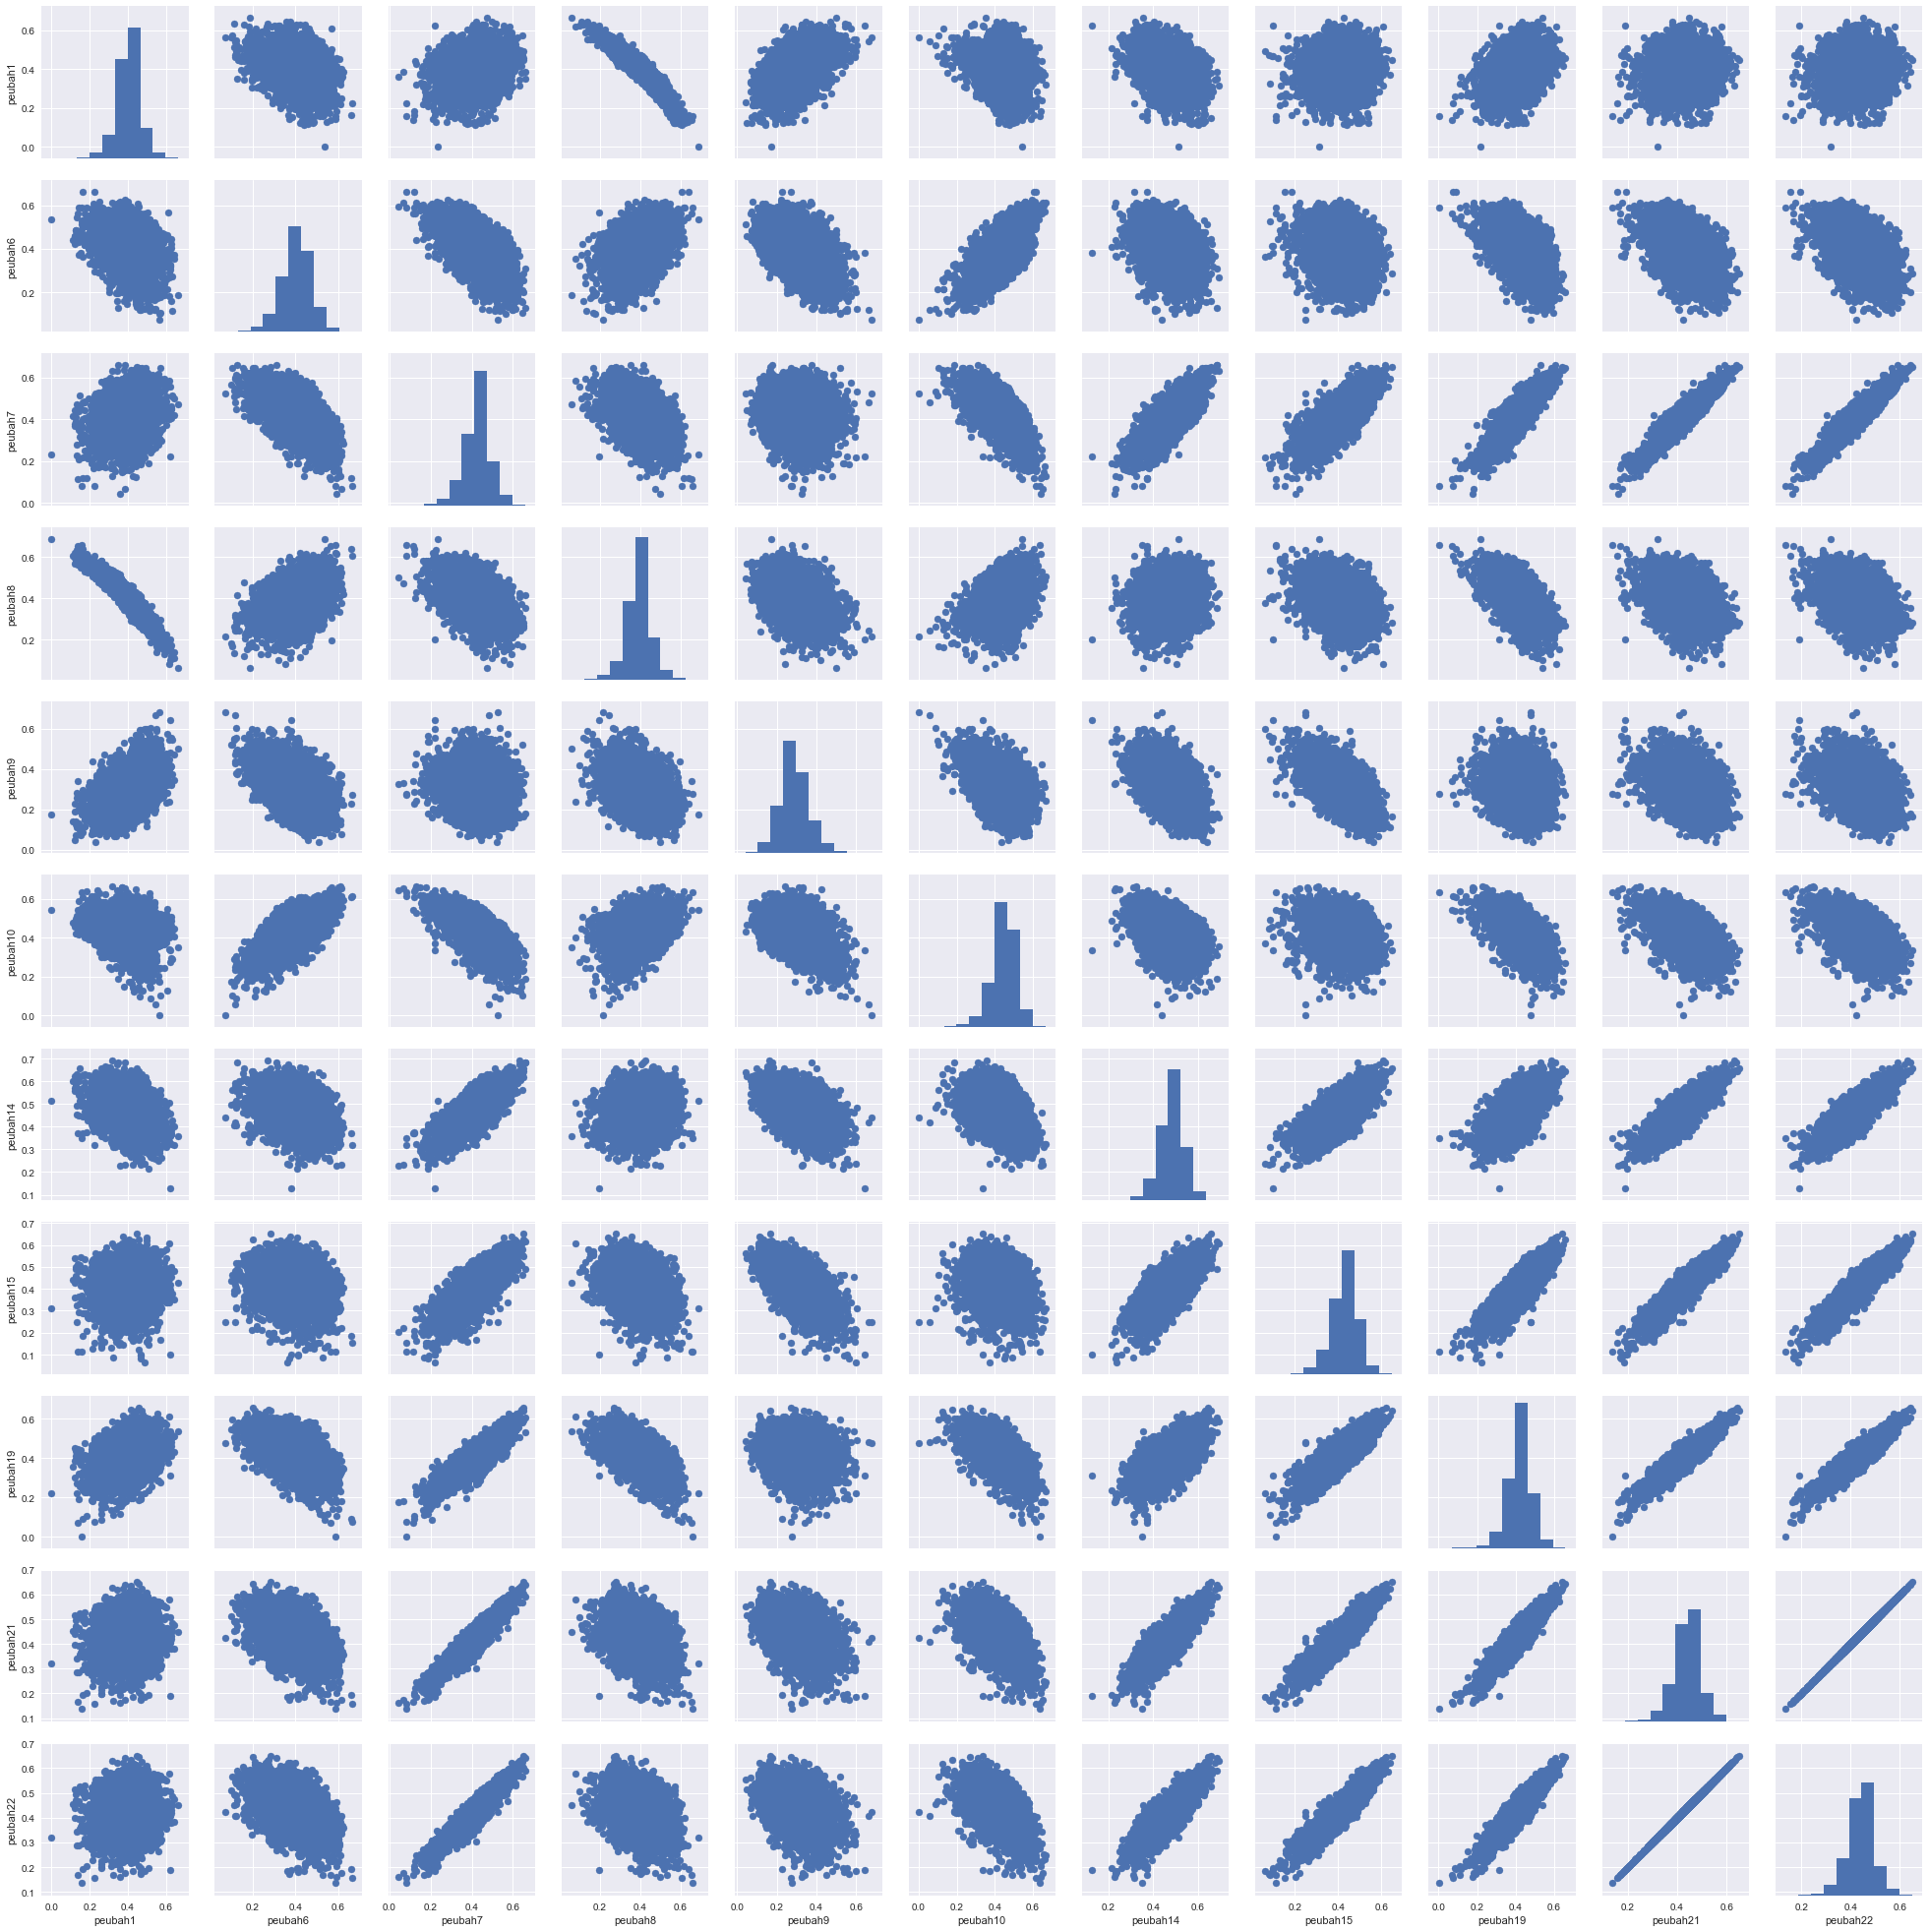

In [324]:
g = sns.PairGrid(x_train_new)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);
plt.show(g)

In [323]:
x_train_new['peubah22'] = (x_train_new['peubah14']+x_train_new['peubah15']+x_train_new['peubah19']+x_train_new['peubah7'])/4

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [325]:
import os
from PIL import Image
import numpy as np
import numpy.linalg as linalg


In [326]:
korelasi = x_train.corr()

In [327]:
eigenvalues,eigenvectors = linalg.eig(korelasi)
idx = np.argsort(-eigenvalues)
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

In [329]:
len(x_train.columns)

21

In [330]:
#Step 5: Only keep the top 'num_eigenfaces' eigenvectors
num_components = len(x_train.columns)
eigenvalues = eigenvalues[0:num_components].copy()
eigenvectors = eigenvectors[:, 0:num_components].copy()